### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Calling DataFrame

In [2]:
#calling encoded dataframe
ds_rev=pd.read_csv("reviews_ratings.csv",encoding="unicode_escape")
ds_rev

,Unnamed: 0,rating,full_review
0,0,5,Really satisfied with the Product I received.....
1,1,5,The Best Phone for the Money\n\nThe iPhone 11 ...
2,2,5,Amazing phone with great cameras and better ba...
3,3,5,This is my first iOS phone. I am very happy wi...
4,4,5,Previously I was using one plus 3t it was a gr...
...,...,...,...
28995,28995,5,My first mirroless camera. After searching a l...
28996,28996,4,Awesome camera in this price range.
28997,28997,5,Pros- Image Quality\nColour reproduction\nWiFi...
28998,28998,5,Amazing... User friendly! Very good picture an...


### Dropping Columns

In [3]:
#dropping lesser important columns from the dataset
ds_rev.drop(["Unnamed: 0"],axis=1,inplace=True)
ds_rev

,rating,full_review
0,5,Really satisfied with the Product I received.....
1,5,The Best Phone for the Money\n\nThe iPhone 11 ...
2,5,Amazing phone with great cameras and better ba...
3,5,This is my first iOS phone. I am very happy wi...
4,5,Previously I was using one plus 3t it was a gr...
...,...,...
28995,5,My first mirroless camera. After searching a l...
28996,4,Awesome camera in this price range.
28997,5,Pros- Image Quality\nColour reproduction\nWiFi...
28998,5,Amazing... User friendly! Very good picture an...


### Creating Columns

In [4]:
#creating new columns for understanding the letter counts
ds_rev["review_length"]=ds_rev.full_review.str.len()

ds_rev

,rating,full_review,review_length
0,5,Really satisfied with the Product I received.....,150
1,5,The Best Phone for the Money\n\nThe iPhone 11 ...,216
2,5,Amazing phone with great cameras and better ba...,114
3,5,This is my first iOS phone. I am very happy wi...,112
4,5,Previously I was using one plus 3t it was a gr...,512
...,...,...,...
28995,5,My first mirroless camera. After searching a l...,109
28996,4,Awesome camera in this price range.,35
28997,5,Pros- Image Quality\nColour reproduction\nWiFi...,193
28998,5,Amazing... User friendly! Very good picture an...,74


### Converting to Lower Case

In [6]:
#converting to lower case
ds_rev["full_review"]=ds_rev["full_review"].str.lower()
 
ds_rev

,rating,full_review,review_length
0,5,really satisfied with the product i received.....,150
1,5,the best phone for the money\n\nthe iphone 11 ...,216
2,5,amazing phone with great cameras and better ba...,114
3,5,this is my first ios phone. i am very happy wi...,112
4,5,previously i was using one plus 3t it was a gr...,512
...,...,...,...
28995,5,my first mirroless camera. after searching a l...,109
28996,4,awesome camera in this price range.,35
28997,5,pros- image quality\ncolour reproduction\nwifi...,193
28998,5,amazing... user friendly! very good picture an...,74


### Feature Engineering

In [7]:
#removing leading and trailing white space
ds_rev["full_review"]=ds_rev["full_review"].str.replace(r"^\s+?$"," ")

In [9]:
#replacing blank space with single space
ds_rev["full_review"]=ds_rev["full_review"].str.replace(r"\s+"," ")

In [10]:
#replacing punctuation
ds_rev["full_review"]=ds_rev["full_review"].str.replace(r"[^\w\d\s]"," ")

### Removing Stopwords

In [11]:
#removing stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))

ds_rev["full_review"]=ds_rev["full_review"].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))  

ds_rev["full_review"]=ds_rev["full_review"].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))   

In [12]:
#printing stopwords
print (stop_words)

{'shan', 'him', 'with', "mustn't", 'don', 'has', 'he', 'his', "you'd", 'to', 'an', 'where', 'just', 'isn', 'do', "aren't", 'that', 'whom', "you've", 'under', 'again', 'doesn', 'at', 'yours', 'because', 'which', 'up', "haven't", 'own', 'm', "mightn't", 'other', 'them', 'here', "that'll", 'between', 'over', 'aren', "wasn't", 'on', 'until', 'ourselves', "doesn't", 'ours', 'further', 'our', 'doing', "shan't", 'and', 'wasn', 'yourself', 'against', 'be', 'mustn', 'who', 'now', "won't", 'or', 'from', 'as', 'you', 'being', 'very', "you'll", 'both', 'why', 'weren', "she's", 'not', 'should', 'such', 'nor', 'no', 'about', "shouldn't", 'had', 'than', "weren't", 'it', 'll', "hasn't", 'those', 'we', 'these', 'too', 'am', 'can', 'wouldn', 'while', "couldn't", 'won', 'there', 'into', 'haven', 'ain', 'once', 'is', 'any', 'off', 'for', 'below', 'before', 'me', 'have', 'did', 'this', 'then', 'down', 'in', 'were', 't', "hadn't", "should've", 'hadn', 'the', 'of', 'so', 'will', "wouldn't", 'been', 'hasn', '

### Making New Columns

In [15]:
#new column clean_length
ds_rev["review_length_new"]=ds_rev.full_review.str.len()

ds_rev

,rating,full_review,review_length,review_length_new
0,5,really satisfied product received itâ totally ...,150,99
1,5,best phone money iphone 11 offers superb camer...,216,175
2,5,amazing phone great cameras better battery giv...,114,77
3,5,first ios phone happy product much satisfied l...,112,55
4,5,previously using one plus 3t great phone decid...,512,329
...,...,...,...,...
28995,5,first mirroless camera searching lot reviews s...,109,81
28996,4,awesome camera price range,35,26
28997,5,pros image quality colour reproduction wifi bl...,193,151
28998,5,amazing user friendly good picture video quali...,74,55


### Displayng Length Removal

In [16]:
#total length removal
print("Original Length",ds_rev.review_length.sum())
print("Cleaned Length",ds_rev.review_length_new.sum())

Original Length 7504450
Cleaned Length 4968300


### Plotting Distribution of Length of Words

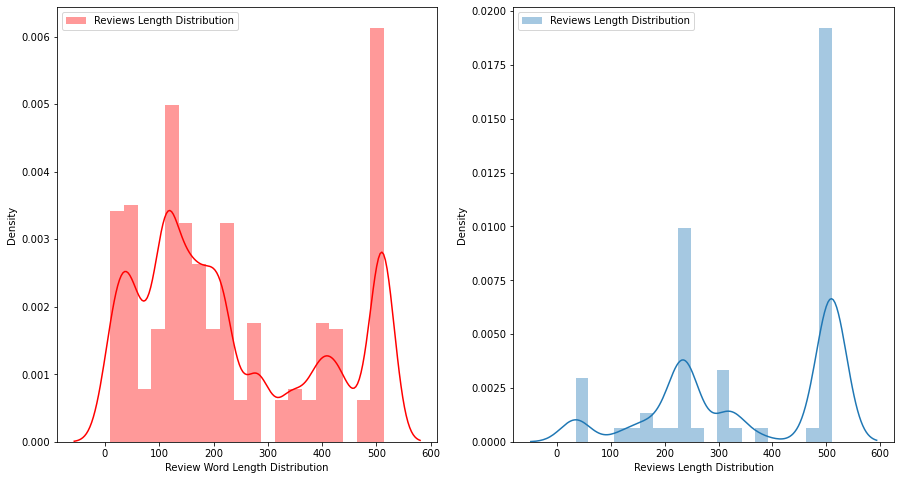

In [22]:
#plotting distribution of cleaned headline length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_rev[ds_rev["rating"]==5]["review_length"],bins=20,ax=ax[0],label="Reviews Length Distribution",color="r")

ax[0].set_xlabel("Review Word Length Distribution")

ax[0].legend()

sns.distplot(ds_rev[ds_rev["rating"]==4]["review_length"],bins=20,ax=ax[1],label="Reviews Length Distribution")

ax[1].set_xlabel("Reviews Length Distribution")

ax[1].legend()

plt.show()

### Creating WordCloud

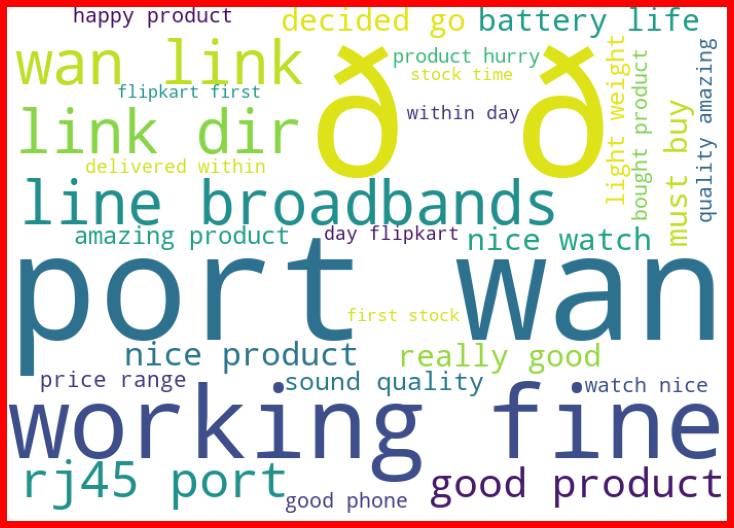

In [25]:
#creating word cloud for the rating five reviews
from wordcloud import WordCloud

five=ds_rev["full_review"][ds_rev["rating"]==5]

five_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(five))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(five_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

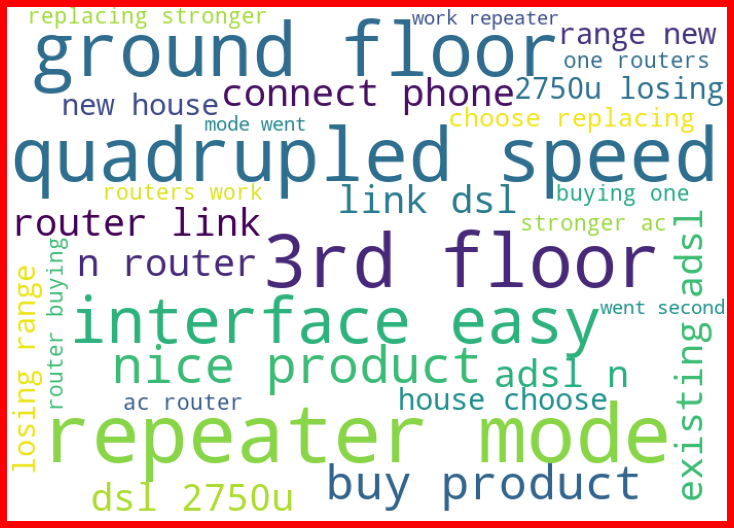

In [26]:
#creating word cloud for the rating four reviews
from wordcloud import WordCloud

four=ds_rev["full_review"][ds_rev["rating"]==4]

four_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(four))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(four_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

### Applying Sentiment Analysis

In [34]:
def apply_sentiment(rating):
    if(rating <=4 ):
        return 0
    else:
        return 1

In [35]:
ds_rev['sentiment'] = ds_rev['rating'].apply(apply_sentiment)
ds_rev.drop(['rating'],axis = 1, inplace = True)

In [36]:
ds_rev

,full_review,review_length,review_length_new,sentiment
0,really satisfied product received itâ totally ...,150,99,1
1,best phone money iphone 11 offers superb camer...,216,175,1
2,amazing phone great cameras better battery giv...,114,77,1
3,first ios phone happy product much satisfied l...,112,55,1
4,previously using one plus 3t great phone decid...,512,329,1
...,...,...,...,...
28995,first mirroless camera searching lot reviews s...,109,81,1
28996,awesome camera price range,35,26,0
28997,pros image quality colour reproduction wifi bl...,193,151,1
28998,amazing user friendly good picture video quali...,74,55,1


### Importing Algorithms and Metrices

In [27]:
#important algorithims and metrices
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Splitting Target and Input Variable

In [37]:
tf_vec=TfidfVectorizer()

features=tf_vec.fit_transform(ds_rev["full_review"])

x=features

y=ds_rev["sentiment"]

### Assigning Aliases

In [30]:
nb=MultinomialNB()
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

### Appending Models

In [31]:
#creating lists
models = []
models.append(('MultinomialNB',nb))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

### Splitting Training and Testing Data

In [38]:
#traning and predicting            
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21750, 629)
(7250, 629)
(21750,)
(7250,)


### Machine Learning

******************* MultinomialNB *********************


MultinomialNB()


Accuracy_score= 0.9630344827586207


Cross_val_score= 0.9508965517241379


roc_auc_score= 0.9155107187894074


classification_report
               precision    recall  f1-score   support

           0       1.00      0.83      0.91      1586
           1       0.95      1.00      0.98      5664

    accuracy                           0.96      7250
   macro avg       0.98      0.92      0.94      7250
weighted avg       0.96      0.96      0.96      7250



[[1318  268]
 [   0 5664]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************* KNeighborsClassifier *********************


KNeighborsClassifier()


Accuracy_score= 0.9630344827586207


Cross_val_score= 0.938103448275862


roc_auc_score= 0.9155107187894074


classification_report
               precision    recall  f1-score   support

           0       1.00      0.83      0.91      1586
           1       0.95      1.00      0.98      5664


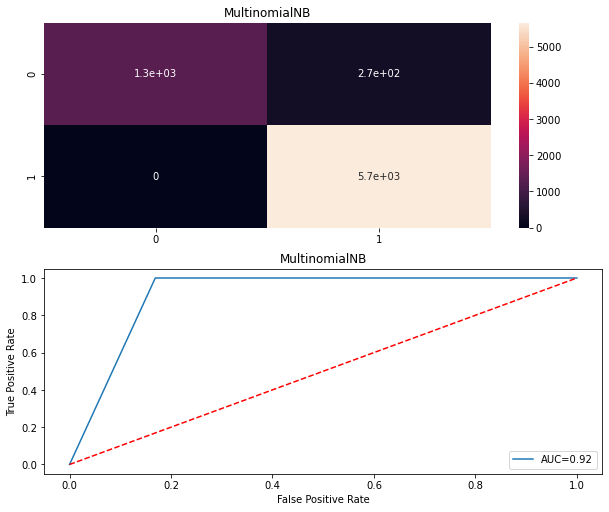

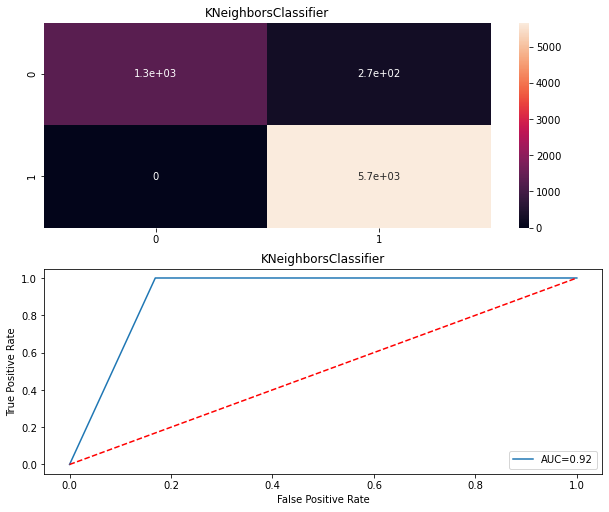

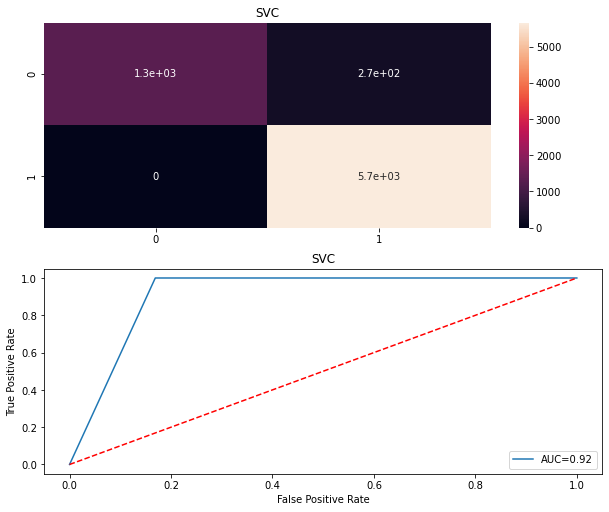

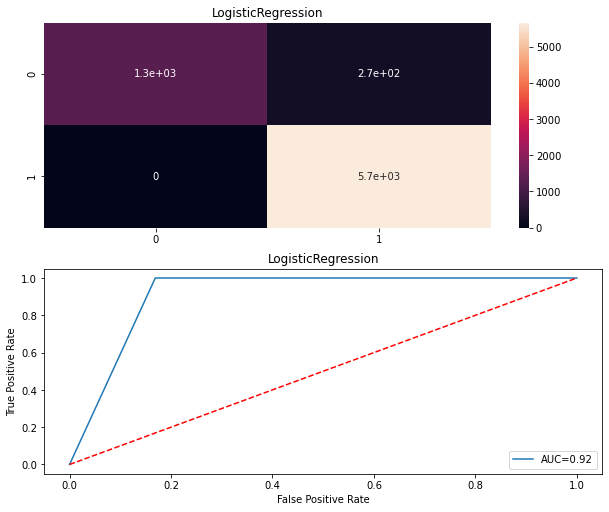

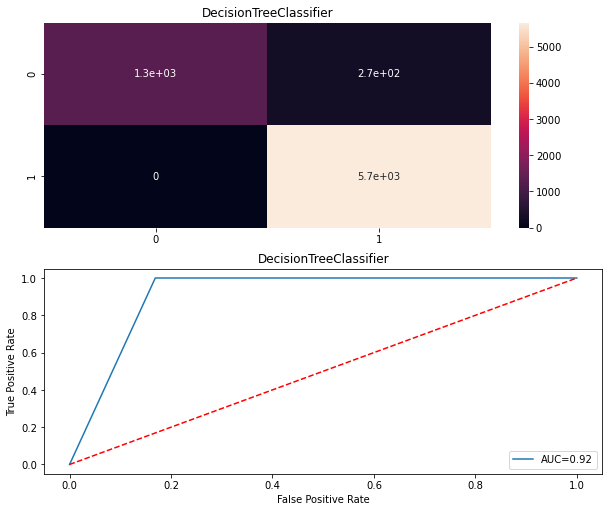

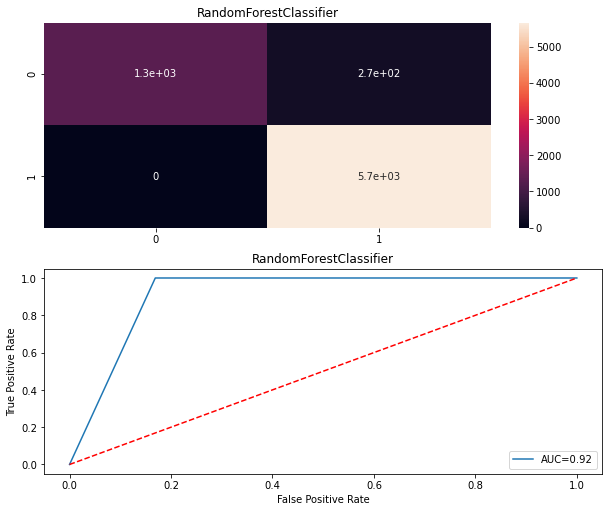

In [39]:
#using a loop function to train test the model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("*******************",name,"*********************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    pred=model.predict(x_test)
    print("\n")
    
    AS=accuracy_score(y_test,pred)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print("\n")
    
    sc= cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("Cross_val_score=",sc)
    cvs.append(sc*100)
    print("\n")
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    
    print("classification_report\n",classification_report(y_test,pred))
    print("\n")
    
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.legend(loc="lower right")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print("\n\n")